# Pet Supply Recommender
by Mai Tran

In [1]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


# **I. BUILDING CUSTOM CNN MODEL FROM SCRATCH**



# 1.   Splitting Image Data Into Train, Val, and Test Datasets




In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/grive/MyDrive/imgs', output="/content/grive/MyDrive/train-val-test", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 7436 files [00:53, 139.20 files/s]


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os, shutil
from glob import glob

In [74]:
import cv2
from keras.preprocessing.image import ImageDataGenerator

# 2. Implementing Data Augmentation

In [75]:
image_gen = ImageDataGenerator(rescale=1./255)

In [76]:
train_dir = '/content/grive/MyDrive/train-val-test/train'
val_dir = '/content/grive/MyDrive/train-val-test/val'
test_dir = '/content/grive/MyDrive/train-val-test/test'

In [ ]:
batch_size = 80
train_generator = image_gen.flow_from_directory(train_dir,
                                          target_size=(150,150),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          class_mode='categorical')
val_generator = image_gen.flow_from_directory(val_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='categorical')
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(150,150),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='categorical')

Found 5945 images belonging to 1 classes.
Found 743 images belonging to 1 classes.
Found 745 images belonging to 1 classes.


# 3. Building Baseline CNN Model

In [ ]:
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras import optimizers
from keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(37, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [ ]:
result = model.fit_generator(train_generator, 
                             validation_data=val_generator,
                             epochs=5,
                             steps_per_epoch=(len(train_generator.labels)/80),
                             validation_steps=(len(val_generator.labels)/80)
                             )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5
74/74 [==============================] - 33s 437ms/step - loss: 283901856.0000 - accuracy: 0.0000e+00 - val_loss: 2419534848.0000 - val_accuracy: 0.0000e+00
Epoch 2/5
74/74 [==============================] - 32s 429ms/step - loss: 57999622144.0000 - accuracy: 0.0269 - val_loss: 225371406336.0000 - val_accuracy: 0.0000e+00
Epoch 3/5
74/74 [==============================] - 32s 434ms/step - loss: 1003706646528.0000 - accuracy: 0.0269 - val_loss: 2964588068864.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
74/74 [==============================] - 32s 431ms/step - loss: 7326048190464.0000 - accuracy: 0.0350 - val_loss: 17873242161152.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
74/74 [==============================] - 32s 430ms/step - loss: 29680813998080.0000 - accuracy: 0.0269 - val_loss: 42151371079680.0000 - val_accuracy: 0.0000e+00


In [ ]:
model.save('multiclass_baseline.h5')

In [ ]:
result.history['accuracy']

[0.0,
 0.026913372799754143,
 0.026913372799754143,
 0.03498738259077072,
 0.026913372799754143]

# 4. Highest Accuracy Achieved For Baseline CNN Model: **0.035**

# 5. Improved Baseline CNN Model: Doubling Image Size and Neural Network Neurons

In [77]:
batch_size = 80
train_generator = image_gen.flow_from_directory(train_dir,
                                          target_size=(300,300),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          class_mode='categorical')
val_generator = image_gen.flow_from_directory(val_dir,
                                        target_size=(300,300),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='categorical')
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(300,300),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='categorical')

Found 5945 images belonging to 1 classes.
Found 743 images belonging to 1 classes.
Found 745 images belonging to 1 classes.


In [78]:
from keras.models import Sequential, Model, load_model
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras import optimizers
from keras.callbacks import ModelCheckpoint

In [79]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(300,300,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256, (3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(37, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 149, 149, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 147, 147, 128)     73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 35, 35, 256)     

In [81]:
result = model.fit_generator(train_generator, 
                             validation_data=val_generator,
                             epochs=5,
                             steps_per_epoch=(len(train_generator.labels)/80),
                             validation_steps=(len(val_generator.labels)/80)
                             )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5
74/74 [==============================] - 42s 533ms/step - loss: 14776389632.0000 - accuracy: 0.0538 - val_loss: 101215354880.0000 - val_accuracy: 0.0000e+00
Epoch 2/5
74/74 [==============================] - 39s 517ms/step - loss: 3107786588160.0000 - accuracy: 0.0269 - val_loss: 14417692459008.0000 - val_accuracy: 0.0000e+00
Epoch 3/5
74/74 [==============================] - 39s 518ms/step - loss: 95567300526080.0000 - accuracy: 0.0269 - val_loss: 290662817726464.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
74/74 [==============================] - 39s 518ms/step - loss: 889062726565888.0000 - accuracy: 0.0269 - val_loss: 1847207317733376.0000 - val_accuracy: 0.0000e+00
Epoch 5/5
74/74 [==============================] - 38s 515ms/step - loss: 4346877076045824.0000 - accuracy: 0.0269 - val_loss: 7568415275352064.0000 - val_accuracy: 0.0000e+00


In [82]:
result.history['accuracy']

[0.053826745599508286,
 0.026913372799754143,
 0.026913372799754143,
 0.026913372799754143,
 0.026913372799754143]

# 6. Highest Accuracy Achieved For Improved Baseline CNN Model: **0.054**

# 7. More Improvements: Decreasing Batch Size, Adding Learning Rate, Changing Activation Function on Improved Baseline CNN Model

In [85]:
batch_size = 32
train_generator = image_gen.flow_from_directory(train_dir,
                                          target_size=(300,300),
                                          batch_size=batch_size,
                                          seed=42,
                                          shuffle=False,
                                          class_mode='categorical')
val_generator = image_gen.flow_from_directory(val_dir,
                                        target_size=(300,300),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='categorical')
test_generator = image_gen.flow_from_directory(test_dir,
                                        target_size=(300,300),
                                        batch_size=batch_size,
                                        seed=42,
                                        shuffle=False,
                                        class_mode='categorical')

Found 5945 images belonging to 1 classes.
Found 743 images belonging to 1 classes.
Found 745 images belonging to 1 classes.


In [89]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

In [90]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(300,300,3), activation='sigmoid'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128, (3,3),activation='sigmoid'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256, (3,3),activation='sigmoid'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(256, (3,3),activation='sigmoid'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(37, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [91]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 298, 298, 64)      1792      
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 149, 149, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 147, 147, 128)     73856     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 73, 73, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 71, 71, 256)       295168    
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 35, 35, 256)     

In [92]:
result = model.fit_generator(train_generator, 
                             validation_data=val_generator,
                             epochs=5,
                             steps_per_epoch=(len(train_generator.labels)/32),
                             validation_steps=(len(val_generator.labels)/32)
                             )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5
185/185 [==============================] - 40s 211ms/step - loss: 59166.2930 - accuracy: 0.0215 - val_loss: 104619.5781 - val_accuracy: 0.0000e+00
Epoch 2/5
185/185 [==============================] - 39s 208ms/step - loss: 141321.2969 - accuracy: 0.0323 - val_loss: 185605.4688 - val_accuracy: 0.0000e+00
Epoch 3/5
185/185 [==============================] - 39s 210ms/step - loss: 240576.5781 - accuracy: 0.0269 - val_loss: 354222.5938 - val_accuracy: 0.0000e+00
Epoch 4/5
185/185 [==============================] - 39s 208ms/step - loss: 332028.7812 - accuracy: 0.0269 - val_loss: 379444.1875 - val_accuracy: 0.0000e+00
Epoch 5/5
185/185 [==============================] - 39s 207ms/step - loss: 418325.6875 - accuracy: 0.0269 - val_loss: 520776.6875 - val_accuracy: 0.0000e+00


In [93]:
result.history['accuracy']

[0.021530698984861374,
 0.03229604661464691,
 0.026913372799754143,
 0.026913372799754143,
 0.026913372799754143]

# 8. Highest Accuracy Achieved For Improved Baseline CNN Model: **0.033**

# 9. Thus, Highest Accuracy Achieved For Custom, Hand-Built CNN Model: **0.054**

# **II. WITH TRANSFER LEARNING**

# 1. Importing VGG16 Pre-Train Model

In [2]:
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import tensorflow
from keras.preprocessing import image
from tensorflow.keras import applications
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.metrics import accuracy_score
from keras.models import load_model
import matplotlib.pyplot as plt
from google.colab import files
import zipfile
import seaborn as sns
import tarfile
import io
import requests

# 2. Downloading Image Data

In [3]:
# Url
image_url = "http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz"
  
# URL of the images to be downloaded  
r = requests.get(image_url) 

with open("images.tar.gz",'wb') as f: 
  
    # Saving received content as a gz file in 
    # binary format 
  
    # write the contents of the response (r.content) 
    # to a new file in binary mode. 
    f.write(r.content)

# 3. Extracting Image Data

In [4]:
## Extract the Data

data = tarfile.open("images.tar.gz", 'r')
data.extractall()

# 4. Storing All Image Data In A List as X and Storing Their Corresponding IDs In Another List as Y

In [6]:
# Store all images

with open('/content/grive/MyDrive/Metis/list.txt', "r") as f:
    check = f.readlines()

images_list = []
cluster_ids = []
for line in check:
    if line[0] == "#":
        pass
    else:
        line = line.strip()
        line = line.split()
        image_name = line[0] + ".jpg"
        cluster_id = line[1]
        images_list.append(image.load_img(r"images/"+image_name, target_size=(224, 224))) 
        cluster_ids.append(cluster_id)
        
X = np.array([image.img_to_array(img) for img in images_list])

# 5. Applying VGG16 Pre-Train Model and Its Weights

In [7]:
## Get the VGG16 models weights
model = applications.VGG16(include_top=False, weights='imagenet')

## Preprocess on our dataset
X_pre = preprocess_input(X)

## Get features
features = model.predict(X_pre)
features_ = features.reshape(7349, -1)

58900480/58889256 [==============================] - 1s 0us/step


# 6. Saving Predicted Features From VGG16

In [8]:
## Save the the featues
np.save('features',features_)

# 7. Transfer Learning/Feature Transfer: Loading Saved Predicted Features From VGG16 To Use Them As Training Data For Logistic Regression

In [9]:
## Load the features
features_ = np.load('features.npy')

# 8. Training and Testing Logistic Regression On Saved Predicted Features From VGG16

In [10]:
# Train Data Using Logistic Regression
## Index of Images
index = np.arange(features_.shape[0])

## Split train and test 
X_train, X_test, y_train, y_test,X_index,y_index = train_test_split(features_, cluster_ids,index, stratify=cluster_ids)

## Train the model
lr = LogisticRegression().fit(X_train, y_train)

## Predict
predict=lr.predict(X_test)

## Print the Accuracy
print('Predicted Accuracy on Test is {}'.format(accuracy_score(y_test,predict,normalize=True)*100))

Predicted Accuracy on Test is 85.90859630032645


# 9. Highest Accuracy Achieved Through Transfer Learning: **.86**

Predicted Accuracy on Test is 85.90859630032645


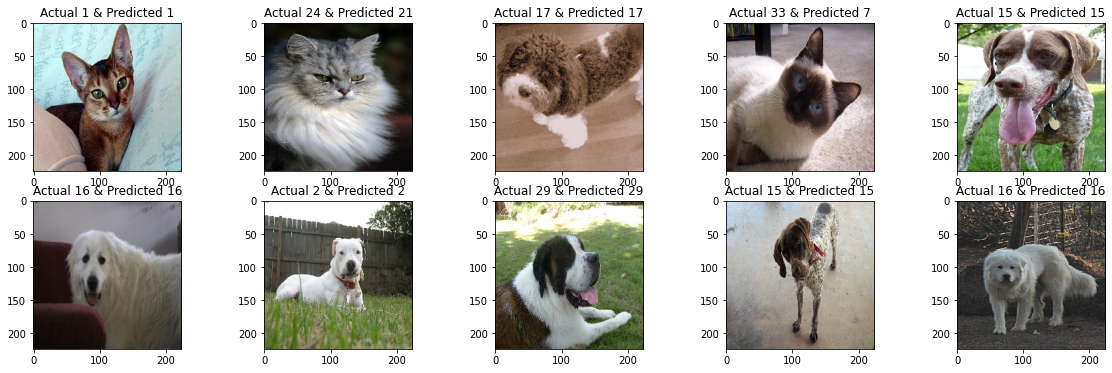

In [11]:
## Visualize the Image with Actual Label and Predicted Label using imshow function from Matplotlib

fig = plt.figure(figsize=(20,6))
axes = fig.subplots(nrows=2, ncols=5)

axes[0,0].set_title('Actual {} & Predicted {}'.format(y_test[0],predict[0]))  ## Label 
axes[0,0].imshow(images_list[y_index[0]]) ## Image

axes[0,1].set_title('Actual {} & Predicted {}'.format(y_test[1],predict[1]))
axes[0,1].imshow(images_list[y_index[1]])

axes[0,2].set_title('Actual {} & Predicted {}'.format(y_test[2],predict[2]))
axes[0,2].imshow(images_list[y_index[2]])

axes[0,3].set_title('Actual {} & Predicted {}'.format(y_test[3],predict[3]))
axes[0,3].imshow(images_list[y_index[3]])

axes[0,4].set_title('Actual {} & Predicted {}'.format(y_test[4],predict[4]))
axes[0,4].imshow(images_list[y_index[4]])

axes[1,0].set_title('Actual {} & Predicted {}'.format(y_test[5],predict[5]))
axes[1,0].imshow(images_list[y_index[5]])

axes[1,1].set_title('Actual {} & Predicted {}'.format(y_test[6],predict[6]))
axes[1,1].imshow(images_list[y_index[6]])

axes[1,2].set_title('Actual {} & Predicted {}'.format(y_test[7],predict[7]))
axes[1,2].imshow(images_list[y_index[7]])

axes[1,3].set_title('Actual {} & Predicted {}'.format(y_test[8],predict[8]))
axes[1,3].imshow(images_list[y_index[8]])

axes[1,4].set_title('Actual {} & Predicted {}'.format(y_test[9],predict[9]))
axes[1,4].imshow(images_list[y_index[9]])
## Print the Accuracy
print('Predicted Accuracy on Test is {}'.format(accuracy_score(y_test,predict,normalize=True)*100))
plt.savefig('image_confusion_matrix_2.png')
plt.show()

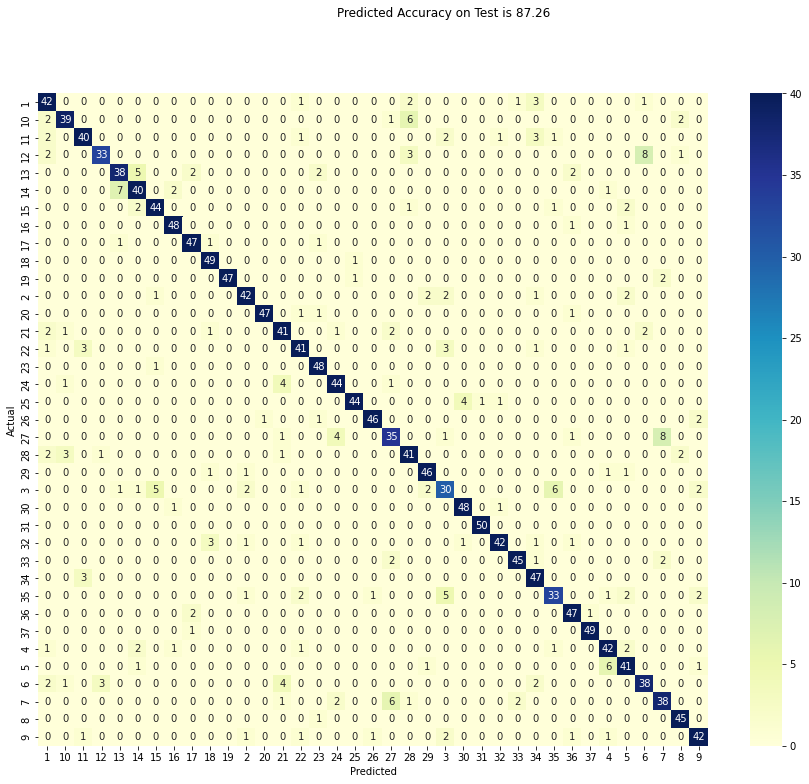

In [12]:
## Visualize the confusion matrix
y=pd.Series(y_test).sort_values(ascending=True)
y_hat = pd.Series(list(predict)).sort_values(ascending=True)
plt.figure(figsize = (15,12))
sns.heatmap(pd.crosstab(y,y_hat,rownames=['Actual'],colnames=['Predicted']), annot=True,  fmt="d",cmap="YlGnBu",robust =True)
plt.suptitle('Predicted Accuracy on Test is 85.91%')
plt.savefig('number_confusion_matrix_2.png')
plt.show()
